# Lab Part 4
## Neural Network Model Template

First step is to load in the paths to the testing and training images. We won't load the full images just yet as this would use a lot of RAM and could crash your computer.

In [2]:
data_dir = 'data' # change this to your data directory
train_dir = data_dir + '/train/' # directory for training images
test_dir = data_dir + '/test/' # directory for test images we use the test images to make sure our model is working well

We create a function that can read in the data from a directory.

In [3]:
import csv
import os
# lets make a function that loads the images and labels
def load_data(directory):
    image__paths = []
    csv_file = ""
    for file in os.listdir(directory): # for each file in the directory
        if file.endswith(".jpg"): # if the file is an image
            image__paths.append(directory + file) # add the image path to the list
        if file.endswith(".csv"): # if the file is a csv file
            csv_file = file # we save it for later

    # now our files are in the train list we need to sort them from smallest file name to largest. The file name is the exact time the image was taken.
    image__paths.sort(key=lambda x: int(x.split('/')[-1][:-4])) # the lambda function returns the numbers in the file name

    # now we need to read the csv file and get the steering angles
    with open(directory + csv_file, 'r') as f:
        reader = csv.reader(f) # create a reader object
        steering_angles = [] # create a list to store the steering angles
        for row in reader: # for each row in the csv file
            steering_angles.append(float(row[0])) # add the steering angle to the list
    return image__paths, steering_angles # return the image paths and steering angles

In [4]:
train_img, train_steer = load_data(train_dir) # load the training data
# check that the data is the same length
print(len(train_img))
print(len(train_steer)) 

155
155


75.66666692495346
(480, 640, 3)


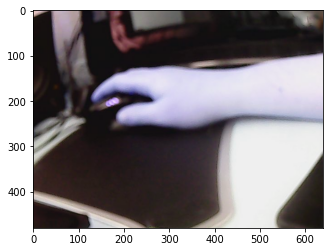

In [16]:
# display the first image and steering angle
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(train_img[0])
plt.imshow(img)
print(train_steer[0])

print(np.shape(img))


Now we create a data generator that automatically fetches the images when we need it.
This generator will also apply our image processing that we learnt about in our last lab.

In [18]:
import numpy as np
import cv2 as cv

def batch_generator(ids, batch_size, image_paths, steering_angles):
    while True:
        for start in range(0, len(ids), batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, len(ids))
            ids_batch = ids[start:end]
            for id in ids_batch:
                img = cv.imread(id)
                img = cv.resize(img, (100, 66))
                x_batch.append(img)
                y_batch.append(steering_angles[ids.index(id)])
            x_batch = np.array(x_batch, np.float32)
            y_batch = np.array(y_batch, np.float32)
            yield x_batch, y_batch


# This is where you will create your model
try modifying the layers to try to get the lowest mse score

In [23]:
import keras as ks
model = ks.models.Sequential()
model.add(ks.layers.InputLayer(input_shape=(100, 66, 3)))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(1))

batch_size = 32

model.compile(optimizer='adam', loss='mse')
model.fit_generator(batch_generator(train_img, 32, train_img, train_steer), steps_per_epoch=np.ceil(float(len(train_img)) / float(batch_size)), epochs=25)

Epoch 1/25


C:\Users\arcxo\AppData\Local\Temp\ipykernel_36172\3850479316.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(batch_generator(train_img, 32, train_img, train_steer), steps_per_epoch=np.ceil(float(len(train_img)) / float(batch_size)), epochs=25)


5/5 [==============================] - 1s 65ms/step - loss: 6974.9717
Epoch 2/25
5/5 [==============================] - 0s 65ms/step - loss: 2925.4158
Epoch 3/25
5/5 [==============================] - 0s 65ms/step - loss: 2503.0579
Epoch 4/25
5/5 [==============================] - 0s 65ms/step - loss: 2695.0845
Epoch 5/25
5/5 [==============================] - 0s 64ms/step - loss: 2412.4985
Epoch 6/25
5/5 [==============================] - 0s 65ms/step - loss: 2371.1697
Epoch 7/25
5/5 [==============================] - 0s 66ms/step - loss: 2316.4741
Epoch 8/25
5/5 [==============================] - 0s 65ms/step - loss: 2329.0330
Epoch 9/25
5/5 [==============================] - 0s 65ms/step - loss: 2342.8340
Epoch 10/25
5/5 [==============================] - 0s 67ms/step - loss: 2322.1970
Epoch 11/25
5/5 [==============================] - 0s 65ms/step - loss: 2303.9480
Epoch 12/25
5/5 [==============================] - 0s 65ms/step - loss: 2295.7424
Epoch 13/25
5/5 [===================